<a href="https://colab.research.google.com/github/Yoon0527/AI_study/blob/main/Hands_on_ML(1~4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1장. 한눈에 보는 머신러닝

In [ ]:
# 삶의 만족도 데이터, 1인당 GDP 데이터를 합치는 함수
# csv 파일 두 개(oecd_bli, gdp_per_capita)를 인자로 받음
def prepare_country_stats(oecd_bli, gdp_per_capita):

    # 
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

    # pivot: 데이터의 열을 기준으로 pivot table로 변환시키는 메서드
    # pivot table: 데이터의 다양한 연산을 가능하게 하는 것
    # index: 그룹핑하고 싶은 column명을 넣는다. 이 경우 Country, 여러 column을 넣을 수 있음, 그냥 열 위치에 들어갈 열이다.
    # columns: 선택적으로 적용하는 설정으로, values를 추가로 구분하기 위해서 선택하는 옵션
    # values: 데이터로 사용할 열
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    # rename: 2015열의 이름을 GDP per capita로 바꾼다. 만약 inplace가 True가 없으면 바뀐 열 이름이 적용되지 않음
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

    # set_index: 인덱스를 테이블에 추가..?
    gdp_per_capita.set_index("Country", inplace=True)

    # merge: 두 df를 합친다.
    # 
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    # GDP per capita 값을 오름차순으로 정렬. inplace가 True면 df에 적용함
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [ ]:
# 필요한 라이브러리 import
# matplotlib.pyplot: 데이터 시각화 라이브러리
# numpy: 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리
# pandas: 데이터 조작 및 분석을 위한 라이브러리
# sklearn: 머신러닝 라이브러리. 여기서는 linear_model. 즉 선형 모델을 불러옴
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
oecd_bli = pd.read_csv('/content/drive/MyDrive/aiffel/hands_on_ml/datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('/content/drive/MyDrive/aiffel/hands_on_ml/datasets/lifesat/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

# 데이터 준비
# np.c_: 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열로 만든다. 1개여도 2차원 배열로 만듦
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [ ]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [ ]:
print(X)

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]


In [ ]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

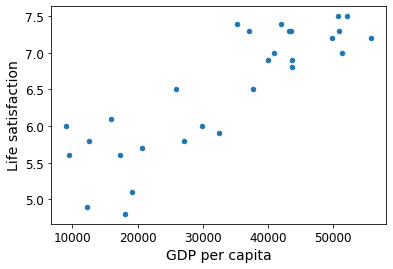

[[5.96242338]]


In [ ]:
# 데이터 시각화
# kind: 그래프의 종류. 여기서는 scatter(산점도), x: x축, y: y축
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# 그래프 출력
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

In [ ]:
# 3-최근접 이웃 회귀 모델로 바꿉니다.
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델을 훈련합니다.
model1.fit(X,y)

# 키프로스에 대한 예측을 만듭니다.
print(model1.predict(X_new)) # 출력 [[5.76666667]]

[[5.76666667]]


# 2장. 머신러닝 프로젝트 처음부터 끝까지

In [ ]:
# 필요한 라이브러리 import
# os: 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해준다. 파일을 복사하거나 디렉터리를 생성하고, 특정 디렉터리 내의 파일 목록을 구하고자 할 때 등.
# tarfile: tar형식의 파일을 압축 해제
# urllib.request: url을 여는 데 도움이 되는 함수와 클래스를 정의한다.
import os
import tarfile
import urllib.request


# url을 변수에 저장
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"

# os.path.join: 인수에 전달된 두 개의 문자열을 결합해 1개의 경로로 만듦. 'datasets' + 'housing'
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"



def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # housing_path 디렉터리가 존재하지 않으면,
    if not os.path.isdir(housing_path):
        # housing_path에 디렉터리를 만들어라.
        os.makedirs(housing_path)

    # housing_path 경로와 'housing.tgz'를 합쳐서 tgz_path 변수에 저장
    tgz_path = os.path.join(housing_path, "housing.tgz")

    # urllib.request.urlretrieve: url이 가리키는 주소에 접근해서 해당 자원을 저장할 수 있음.
    urllib.request.urlretrieve(housing_url, tgz_path)

    # tgz_path에 저장된 경로가 가리키는 tgz파일을 open
    housing_tgz = tarfile.open(tgz_path)

    # extractall: 모든 파일 압축 해제
    housing_tgz.extractall(path=housing_path)

    # open 함수로 열었던 걸 닫는 함수
    # close 해주지 않고 이후에 다시 사용하면 오류가 발생할 수 있다.
    housing_tgz.close()

In [ ]:
# 현재 작업 공간에 datasets/housing 디렉터리를 만들고
# housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다.
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):

    # 인자로 받은 housing_path와 'housing.csv'를 join
    # 즉, csv_path 변수에는 housing_path 경로에 있는 housing.csv 파일을 가리키는 정보가 있음
    csv_path = os.path.join(housing_path, "housing.csv")

    # csv_path에 있는 housing.csv를 pandas dataframe으로 읽어 반환
    return pd.read_csv(csv_path)

In [ ]:
# load_housing_data 함수에서 반환된 pd.read_csv(csv_path)가 저장된다.
housing = load_housing_data()

# housing 변수에 저장된 dataframe을 위에서 5개만 확인
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 형태 확인
# 20640개의 데이터가 있고 10개의 feature가 있다.
housing.shape

(20640, 10)

In [ ]:
# 데이테에 대한 간략한 설명과 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


위 info()의 결과에서 ocean_proximity만 type이 object인데, 데이터를 csv에서 읽어 들였기 때문에 텍스트 특성일 것이라는 걸 알 수 있음. 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구영이 있는지 알아보자.

In [ ]:
# ocean_proximity 열의 값에 대해 알아보기
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# describe 메서드는 숫자형 특성의 요약 정보를 보여준다.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* count: 총 데이터의 개수
* mean: 데이터들의 평균값
* std: 값이 퍼져있는 정도를 측정하는 표준편차
* min: 최소값
* 25%, 50%, 75%: 백분위수. 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값을 나타낸다.
  * 25%의 구역은 housing_median_age가 18보다 작고, 50%는 29보다 작고 75%는 37보다 작다. 
* max: 최대값

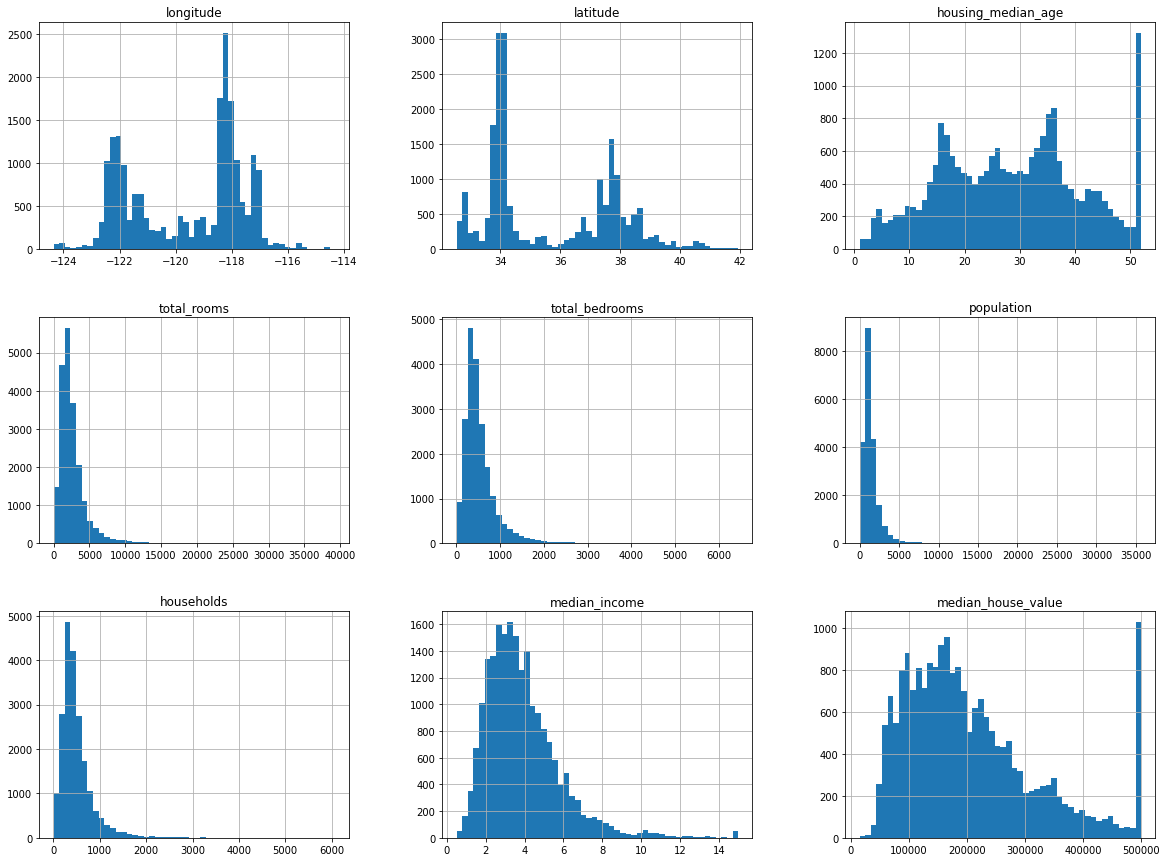

In [ ]:
# 각 숫자형 특성을 히스토그램으로 그려 데이터의 형태를 빠르게 검토한다.
# matplotlib inline 메서드로 그래프를 그리기 전에 matplotlib이 사용할 백엔드를 지정해준다.
# 그 이유는 화면에 그래프를 그리기 위해 사용자 컴퓨터의 그래픽 백엔드를 필요로 하기 때문이다.
# 이 메서드를 사용해서 자체 백엔드를 사용하게끔 설정한다.
%matplotlib inline
import matplotlib.pyplot as plt

# 히스토그램 그리기
# hist: 히스토그램 메서드, bins: 가로축 구간의 개수, figsize: 그래프의 사이즈
# 그 외에 histtype 인자로 히스토그램의 종류를 지정할 수도 있다. (histtype='bar', 'barstacked', 'step', 'stepfilled' 등.)
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 테스트 셋 만들기

In [ ]:
import numpy as np
# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

In [ ]:
# 데이터와 test_ratio(test셋의 비율)을 인자로 받는다
def split_train_test(data, test_ratio):
    # len(data)만큼의 무작위로 섞인 배열을 만들어 shuffled_indices 변수에 저장한다.
    # 섞어주지 않으면 과적합의 위험이 있나?? 또는 학습과 검증의 성능을 올리기 위해서?
    shuffled_indices = np.random.permutation(len(data))

    # test_set의 사이즈를 len(data)와 test_ratio의 곱으로 정한다.
    # 예를 들어 데이터는 20640개, 비율을 test_ratio를 0.2로 하면 전체 데이터셋에 20%가 test set이 된다. 
    test_set_size = int(len(data) * test_ratio)

    # test_indices에 데이터의 수만큼의 범위의 수를 무작위로 섞은 numpy 배열 중 0번째부터 test_set_size까지의 배열을 저장
    test_indices = shuffled_indices[:test_set_size]

    # train_indices에 test_set_size부터 끝까지의 배열을 저장
    train_indices = shuffled_indices[test_set_size:]

    # iloc: integer location의 약어로, 데이터프레임의 행이나 컬럼에 인덱스 값으로 접근한다. <-> loc: df의 행이나 컬럼에 label이나 boolean array로 접근
    # data에 train_indices에 저장된 인덱스값을 이용해 접근하고 반환, 마찬가지로 test_indices도 반환한다.
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# housing 데이터와 test_ratio로 0.2를 넘겨준다
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [ ]:
# zlib: 압축과 압축 해제를 위한 라이브러리
# crc32: CRC(Cyclic Redundancy Check, 순환 중복 검사)는 네트워크 등을 통하여 데이터를 전송할 때 전송된 데이터에 오류가 있는지 확인하기 위한 체크값을 결정하는 방식
  # crc8, 10, 16, 32 유형이 있다.
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [ ]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [ ]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [ ]:
# sklearn_model_selection 모듈에 train_test_split을 import
from sklearn.model_selection import train_test_split

# train_test_split: 데이터를 train과 test set으로 나눠준다.
# (나누고자 하는 데이터, test_size= 비율, random_state=난수 초깃값 설정)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [ ]:
# pd.cut: 수치형 변수를 특정 구간으로 나눈 범주형 레이블을 생성할 수 있다. 특정 구간에 대한 그룹별 통계량을 구하는 것을 가능하게 한다.
# pd.cut(데이터[열], bins=나누고자 하는 구간, labels=라벨명)
# np.inf: 무한대 범위를 지정(bin을 정의하기 위함이라는데 잘 모르겠다. 참고: https://kongdols-room.tistory.com/175) 
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
# housing 데이터에서 income_cat 열의 수치형 값들을 확인
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

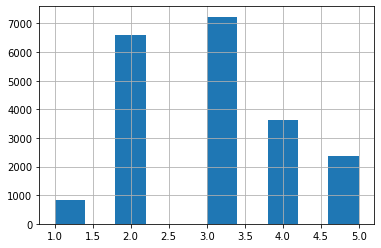

In [ ]:
# housing 데이터 중 income_cat 열의 히스토그램을 그린다.
housing["income_cat"].hist()

In [ ]:
# StratifiedShuffleSplit: 계층적 샘플링을 위해 사용한다. StratifiedKFold의 계층 샘플링과 ShuffleSplit의 랜덤 샘플링을 합친것으로, 
# test_size와 train_size 매개변수의 합을 1 이하로 지정할 수도 있다.
from sklearn.model_selection import StratifiedShuffleSplit

# n_split: 나누고자 하는 train/test set의 개수. 1개의 train/test set만 분할하니까 1로 지정
# test_size: test set의 비율
# random_state: 난수 초기값
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# housing 데이터를 train_index, housing 데이터에서 income_cat 열의 데이터를 test_index에 할당?
for train_index, test_index in split.split(housing, housing["income_cat"]):

    # strat_train_set에 housing 데이터의 train_index에 해당하는 label값을 할당
    strat_train_set = housing.loc[train_index]

    # strat_test_set에 test_index에 해당하는 label 할당?
    strat_test_set = housing.loc[test_index]

In [ ]:
# 테스트 셋에서 소득 카테고리의 비율
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
# housing 소득 카테고리의 비율
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
# income_cat feature 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 데이터 이해를 위한 탐색과 시각화

In [ ]:
# 원본을 손상시키지 않기 위해 복사
housing = strat_train_set.copy()

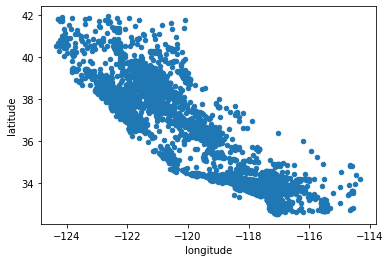

In [ ]:
# x축에 longitude, y축에 latitude로 두고 산점도 그래프 출력
housing.plot(kind="scatter", x="longitude", y="latitude")

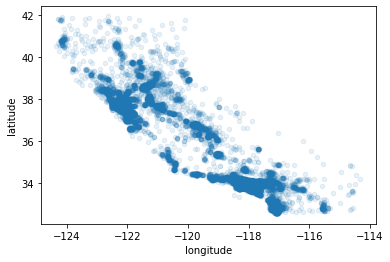

In [ ]:
# 밀집 영역을 보기 위해 parameter로 alpha=0.1을 준다.
# alpha: 0에서 1 사이의 값을 입력 받아 투명도를 조절.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

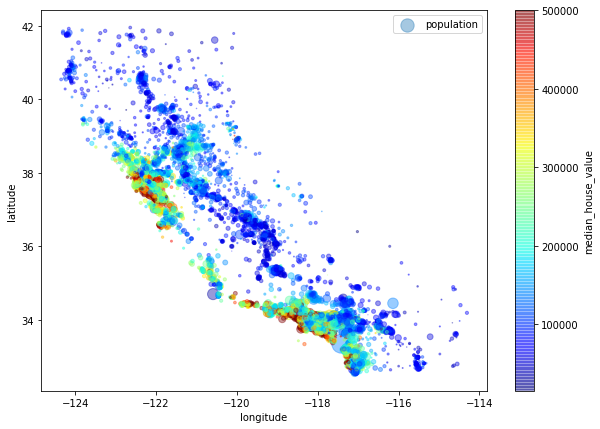

In [ ]:
# plot의 매개 변수 (https://kongdols-room.tistory.com/92)
# s: 원의 반지름, 여기서는 구역의 인구를 나타낸다.
# label은 인구로 설정
# c: 마커의 색을 설정. 가격을 나타낸다.
# cmap: 낮은 가격(파란색)에서 높은 가격(빨간색)까지 범위를 나타낸다. 
# colorbar: 그래프 오른쪽에 colorbar 출력
# sharex: 모든 서브plot이 같은 x축 눈금을 사용하도록 xlim을 조정하면 모든 서브 plot에 조정
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

# legend(범례)는 그래프에 데이터의 종류를 표시하기 위한 텍스트이다
# 여기서는 population
plt.legend()

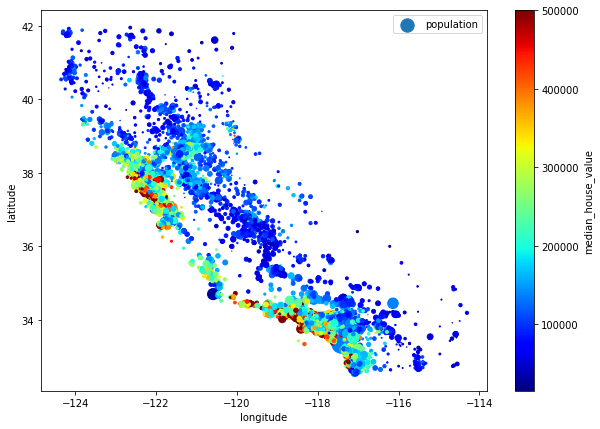

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1.0,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [ ]:
# Download the California 
# 경로를 '.'로 지정하는 건 현재 위치를 뜻한다.
PROJECT_ROOT_DIR = "."

# join 메서드로 경로를 합쳐준다. PROJECT_ROOT_DIR과 images, end_to_end_project(핸즈온 머신러닝 2장의 이름) 
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")

# 디렉터리 생성. 
# exist_ok: True로 두면 폴더 생성 경로에 폴더가 없을 경우 자동으로 생성해준다. 
os.makedirs(images_path, exist_ok=True)

# 다운로드 경로 지정
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

# 파일 이름 지정
filename = "california.png"
print("Downloading", filename)

# url 지정
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

# urlretrieve: 바로 파일에 자료를 입력할 수 있다.
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f125f87d450>)

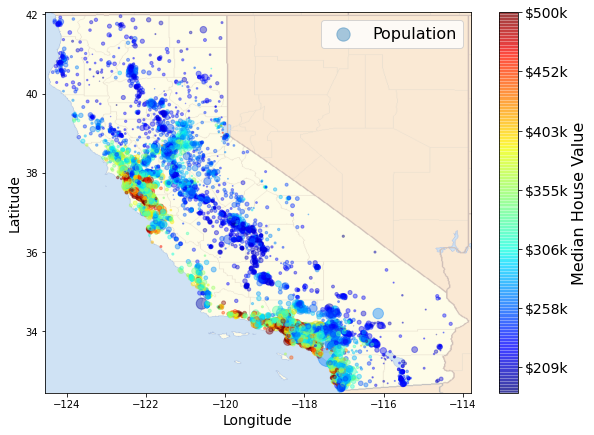

In [ ]:
# mpimg로 이미지 파일을 matplotlib으로 출력한다.
import matplotlib.image as mpimg

# imread 메서드를 사용해 인자로 넘어온 경로(os.path.join을 통해 합쳐준 경로)의 이미지를 읽어온다.
california_img=mpimg.imread(os.path.join(images_path, filename))

# 위에서 했던 그래프 출력
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

# 이미지 출력
# extent: 이미지맵의 x축과 y축 범위는 index로 되어 있는데, index를 원하는 범위로 변경하고 싶을 때 사용.
# alpha: 투명도?
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# ylabel: y축의 라벨 지정, xlabel: x축의 라벨 지정
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# prices 변수에 housing 데이터의 median_house_value열의 데이터를 저장
prices = housing["median_house_value"]

# linspace: 구간 내의 숫자를 균일한 간격으로 촘촘하게 채울 수 있는 함수. 인자로 (구간 시작점, 구간 끝점, 구간 내 숫자 개수)를 지정한다.
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### 상관관계 조사

In [ ]:
# corr: 각 열 간의 상관계수를 반환하는 메서드
corr_matrix = housing.corr()

In [ ]:
# 중간 주택 가격과 다른 feature 간 상관관계 크기가 얼마나 되는지 출력
# ascending: 오름차순과 내림차순을 결정하는 인수. True는 오름차순, False는 내림차순이다.
# 상관 관계는 1에서 -1까지이다. 1에 가까우면 양의 상관관계, -1에 가까우면 음의 상관관계
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

예를 들어 중간 주택 가격은 중간 소즉이 올라갈 때 증가하는 경향이 있다. 그리고 0에 가까우면 선형적인 상관관계가 없다는 뜻임.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12602ee810>,
      dtype=object)

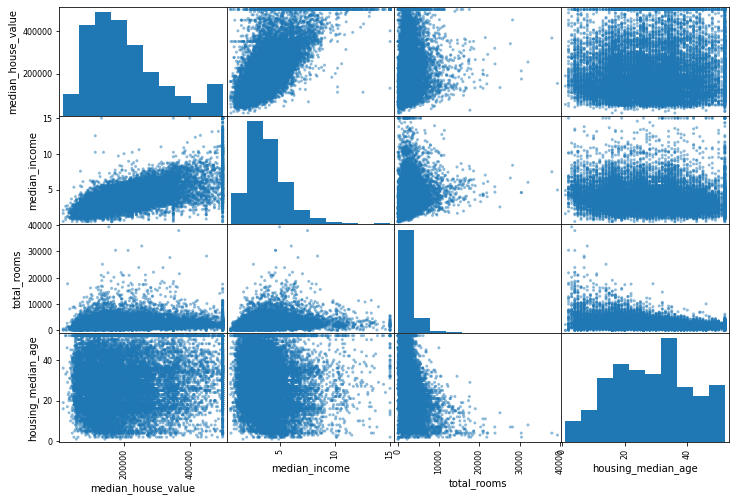

In [ ]:
# scatter_matrix: 숫자형 특성 사이에 산점도를 그려주는 함수. 이를 활용해 특성 사이의 상관관계를 확인
from pandas.plotting import scatter_matrix

# 11개의 특성을 전부 출력하면 너무 많기 때문에 높은 상관계를 보이는 몇 개만 봄
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

왼쪽 위에서 오른쪽 아래까지의 대각선에 위치한 그래프는 자기 자신에 대한 것이기 때문에 유용하지 않다. 그래서 판다스는 이 곳에 각 특성의 히스토그램을 그림.(다른 옵션도 가능)

중간 주택 가격을 예측하는 데 가장 유용할 것 같은 특성은 중간 소득(median_income)이므로 상관관계 산점도를 확대해보자

(0.0, 16.0, 0.0, 550000.0)

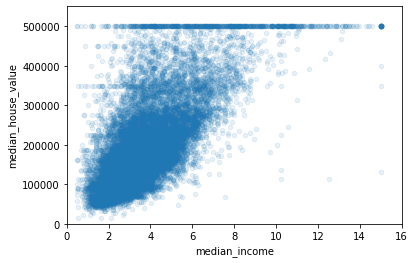

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

# x축과 y축의 범위 지정
plt.axis([0, 16, 0, 550000])

### 특성 조합으로 실험

In [ ]:
# 새로운 특성을 만듦
# rooms_per_household: 방 개수와 가구당 인원을 나눈 값
# bedrooms_per_rooms: 침실 수와 전체 방 개수를 나눈 값
# population_per_household: 인구와 가구당 인원을 나눈 값
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
# 상관관계 행렬을 다시 확인
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

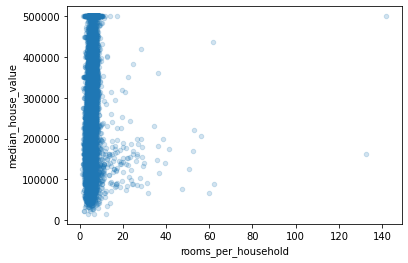

In [ ]:
# rooms_per_household와 median_house_value의 상관관계를 산점도로 분석
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.show()

### 머신러닝 알고리즘을 위한 데이터 준비

In [ ]:
# 훈련 세트를 위해 레이블 삭제
# drop은 데이터 복사본을 만들며 strat_train_set에는 영향을 주지 않는다.
housing = strat_train_set.drop("median_house_value", axis=1)

# 원래 훈련 세트로 복원
housing_labels = strat_train_set["median_house_value"].copy()

#### 데이터 정제

누락된 특성(Null) 값을 처리하는 옵션들

housing.dropna(subset=["total_bedrooms"])    # 옵션 1(해당 구역을 제거)

housing.drop("total_bedrooms", axis=1)       # 옵션 2(전체 특성을 제거)

median = housing["total_bedrooms"].median()  # 옵션 3(0, 평균, 중간값 등 어떤 값으로 채운다.)

housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
# 옵션 1
# subset: subset에 지정된 컬럼에 결측치가 있는 경우 삭제하라는 의미
housing.dropna(subset=['total_bedrooms'])

# 옵션 2
housing.drop('total_bedrooms', axis=1)

# 옵션 3
# 중간값을 꼭 저장해야 한다. 나중에 시스템을 평가할 때 테스트 셋에 있는 누락된 값과 시스템이 실제 운영될 때 새로운 데이터에 있는 누락된 값을 채워넣는데 필요하기 때문이다.
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [ ]:
# sklearn의 SimpleImputer는 누락된 값을 쉽게 다루게 해준다.
from sklearn.impute import SimpleImputer

# 누락된 값을 중간값(median)으로 대체한다고 지정하고 SimpleImputer의 객체를 생성
imputer = SimpleImputer(strategy="median")

In [ ]:
# 중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제한다.
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
# 생성한 객체에 fit 메서드를 사용해 훈련 데이터에 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

각 특성의 중간 값이 수동으로 계산한 것과 같은지 확인한다

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# train set을 변환
X = imputer.transform(housing_num)

In [ ]:
# X에 저장된 변형된 특성들은 넘파이 배열이기 때문에 pandas dataframe으로 되돌린다.

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

#### 텍스트와 범주형 특성 다루기

In [ ]:
# 범주형 feature인 ocean_proximity를 전처리하기 위해 확인하는 코드
# housing_cat에 ocean_proximity를 저장
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
# ocean_proximity는 임의의 텍스트값이 아닌 특정한 값이기 때문에 범주형 특성이다.
# 대부분의 머신러닝 알고리즘은 숫자를 다루기 때문에 sklearn의 OrdinalEncoder 클래스를 사용해 이 데이터를 숫자로 변환해준다.
from sklearn.preprocessing import OrdinalEncoder

# 객체 생성
ordinal_encoder = OrdinalEncoder()

# housing_cat에 저장된 ocean_proximity 데이터들을 숫자로 변환
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# categories_ 인스턴스 변수를 사용해 카테고리 목록을 얻을 수 있다.
# 범주형 특성마다 카테고리들의 1D 배열을 담은 리스트가 반환된다.
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# 원핫 인코딩을 위해 sklearn에서 제공하는 OneHotEncoder 클래스를 활용한다.
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
cat_encoder = OneHotEncoder()

# 변환 적용
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
# 위 결과를 보면 OneHotEncoder는 기본적으로 희소 행렬을 반환한다. 
# 희소행렬은 수천 개의 카테고리가 있는 범주형 특성일 경우 매우 효율적임.
# 이런 특성을 원-핫 인코딩하면 열이 수천 개인 행렬로 변하고 각 행은 1이 하나뿐이고 그 외에는 모두 0으로 채워져 있을 것이다. 
# 0을 모두 메모리에 저장하는 것은 낭비이므로 희소 행렬은 0이 아닌 원소의 위치만 저장한다!!
# 이 행렬을 거의 일반 적인 2차원 배열처럼 사용할 수 있지만, 넘파이 배열로 바꾸려면 toarray() 메서드를 호출한다.
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# 또는 애초에 sparse를 False로 지정해 넘파이 배열 형태로 출력할 수도 있다.
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# categories_ 변수를 사용해 카테고리 리스트를 얻을 수 있다.
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 나만의 변환기

In [ ]:
# BaseEstimator: 하이퍼파라미터 튜닝에 필요한 두 메서드 get_params()와 set_params()를 얻는다.
  # 하이퍼파라미터: 사람이 조절해야하는 파라미터
  # 생성자에 *args나 **kargs를 사용하지 않아야 한다.
    # *args: *arguments의 줄임말. 여러 개의 인자를 함수로 받고자 할 때 쓴다.
    # **kargs: 키워드 형태로 특정 함수를 호출할 수 있다.
    # https://brunch.co.kr/@princox/180
# TransformerMixin: 마지막에 fit_transform() 메서드는 TransformerMixin으로 구현이 되어 있다.
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# BaseEstimator와 TransformerMixin을 상속받는다.
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

#### 변환 파이프라인

In [ ]:
# Pipeline: 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스
# StandardScaler: 데이터의 scale을 평균 0, 분산 1로 조정해준다.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline 객체 안에 지정된 변환기를 순서대로 처리
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# 변환을 적용
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [ ]:
# ColumnTransformer: 범주형 열과 수치형 열을 하나의 변환기로 처리할 수 있게 해줌
from sklearn.compose import ColumnTransformer

# num_attribs에 housing_num 데이터를 리스트 형태로 저장
num_attribs = list(housing_num)

# 범주형 데이터인 ocean_proximity를 cat_attribs에 저장
cat_attribs = ["ocean_proximity"]

# ColumnTransformer를 사용해 범주형과 수치형 모두 처리한 후 full_pipeline에 저장
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# 변환 결과를 적용한다.
housing_prepared = full_pipeline.fit_transform(housing)

### 모델 선택과 훈련

In [ ]:
# 선형 모델 중 선형 회귀 모델 
from sklearn.linear_model import LinearRegression

# 객체 생성
lin_reg = LinearRegression()

# 모델 훈련
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
레이블: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

# 전체 train set에 대한 회귀 모델의 RMSE를 측정
  # RMSE: 예측값과 실제 값의 차이를 제곱한 값의 평균인 MSE에 루트를 취한 값으로, MSE의 단점을 보완한 값이다.
  # 참고: https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

# 예측값 저장
housing_predictions = lin_reg.predict(housing_prepared)

# MSE를 계산
lin_mse = mean_squared_error(housing_labels, housing_predictions)

# MSE에 루트를 취한다.
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [ ]:
# 위 모델의 성능이 만족스럽지 않은 이유는 과소적합 때문이다.
# 과소 적합을 해결하는 방법은,
  # 1. 더 강력한 모델을 선택한다.
  # 2. 훈련 알고리즘에 더 좋은 특성을 주입해준다.
  # 3. 모델의 규제를 감소시키는 방법
# 이 모델에서는 규제를 사용하지 않았기 때문에 3번은 제외. 우선 더 복잡한 모델을 시도하기 위해 DecisionTreeRegressor를 훈련
from sklearn.tree import DecisionTreeRegressor

# 난수 초기값을 42로 주고 객체 생성
tree_reg = DecisionTreeRegressor(random_state=42)

# 학습
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

오차가 0인 이유는 과대적합이 되었기 때문이다. 

#### 교차 검증을 사용한 평가

In [ ]:
# cross_val_score: 교차 검증을 위한 함수
from sklearn.model_selection import cross_val_score

# decision tree 모델을 sklearn의 k-fold cross validation 기능을 사용해 교차 검증을 수행.
# (훈련 모델, 데이터, 라벨, 예측 성능 평가 지표, 교차 검증 폴드 수)
# cv: 이 경우 10으로 주고 train set을 10개의 서브셋으로 무작위 분할한다. 매번 다른 폴드를 선택해 평가에 사용하고 나머지 9개 폴드는 훈련에 사용한다. 
  # 10개의 평가 점수가 담긴 배열이 결과가 된다.
# sklearn의 교차 검증 기능은 scoring 매개변수에 비용함수가 아니라 효용 함수, 즉 낮을 수록 좋은 비용함수가 아니라 클 수록 좋은 효용함수를 기대한다.
# 그래서 평균 제곱 오차(MSE)의 반대값(음수값)을 계산하는 neg_mean_squared_error 함수를 사용한다.
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

# 위 neg_mean_squared_error 함수를 사용했기 때문에 제곱근을 계산하기 전에 -scores로 부호를 바꾼다.
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
평균: 71629.89009727491
표준 편차: 2914.035468468928


In [ ]:
# 위 decision tree 결과가 좋지 않음. 비교를 위해 선형 회귀 모델의 점수를 계산
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
평균: 69104.07998247063
표준 편차: 2880.3282098180644


In [ ]:
# RandomForestRegressor 모델을 시도.
  # 특성을 무작위로 선택해서 많은 결정 트리를 만들고 그 예측을 평균내는 방식으로 작동한다.
# ensemble: 여러 다른 모델을 모아서 하나의 모델을 만드는 것
from sklearn.ensemble import RandomForestRegressor

# 객체 생성
# n_estimators: 생성할 트리의 개수
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
평균: 50435.58092066179
표준 편차: 2203.3381412764606


### 모델 세부 튜닝

#### 그리드 탐색

In [ ]:
# 랜덤 포레스트에 대한 그리드서치
# 그리드 탐색: 최적의 하이퍼파라미터 조합을 찾을 때까지 값들을 조정하면서 탐색한다.
  # GridSearchCV를 사용해 수행하면 편함
from sklearn.model_selection import GridSearchCV

# GridSearchCV를 사용하기 위해 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정
param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
      # 3은 트리의 개수를 지정해준 하이퍼파라미터, 4는 적용할 feature의 개수
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
      # bootstrap: 모집단(전체 데이터)에서 무작위 복원 추출을 통해 여러 개의 학습 데이터 표본을 추출하는 것을 말한다. True가 기본값이다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# 그리드 탐색을 통해 찾은 최상의 파라미터 조합 출력
# 단, 8과 30은 각각 탐색 범위의 최댓값이기 때문에 계속 점수가 향상될 가능성이 있으므로 더 큰 값으로 다시 검색해야 한다.
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
# 최적의 추정기에 직접 접근
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
# 그리드 탐색으로 찾은 하이퍼파라미터 조합의 점수를 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

#### 랜덤 탐색

In [ ]:
# RandomizedSerachCV를 사용해 랜덤 탐색 수행
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# 하이퍼파라미터를 탐색할 구간을 지정. 트리의 개수는 1~200 사이, feature는 1~8사이로
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

# 랜덤 포레스트 객체 생성
forest_reg = RandomForestRegressor(random_state=42)

# 랜덤 탐색 수행
# (랜덤포레스트 모델, 파라미터 설정값, n_iter=, 반복 횟수?, 성능 평가 지표, 난수 초기값)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# 랜덤 탐색 수행
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f124997e4d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f124963c310>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# 결과 저장
cvres = rnd_search.cv_results_

# 결과 출력
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


#### 최상위 모델과 오차 분석

In [ ]:
# 각 특성의 상대적인 중요도를 출력
# grid_search.best_estimator_.feature_importances_ 메서드를 통해 중요도를 변수에 저장한다.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

### test set으로 시스템 평가하기

In [ ]:
# 최종 모델을 그리드 탐색을 통해 찾은 최적의 파라미터값으로 저장
final_model = grid_search.best_estimator_

# strat_test_set에서 median_house_value 특성을 삭제한다.
X_test = strat_test_set.drop("median_house_value", axis=1)

# y_test에 strat_test_set의 median_house_value 값을 복사한다.
y_test = strat_test_set["median_house_value"].copy()

# 변환기에 x_test를 인자로 넣어 전처리
X_test_prepared = full_pipeline.transform(X_test)

# test set을 모델에 적용해본다
final_predictions = final_model.predict(X_test_prepared)

# MSE 값 계산
final_mse = mean_squared_error(y_test, final_predictions)

# MSE에 루트를 취해 RMSE를 구한다.
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

47873.26095812988

In [ ]:
# 신뢰구간을 계산할 때 사용하는 stats.t.interval()을 사용하기 위해 scipy에서 stats를 import
from scipy import stats

# 일반화 오차를 지정. 여기서는 95%
  # 일반화 오차(generalization error): 알고리즘이 전례가 없는 데이터에 대한 결과값을 얼마나 정확하게 예측할 수 있는지의 정도
confidence = 0.95

# 정답과 예측값의 오차의 제곱
squared_errors = (final_predictions - y_test) ** 2

# stats.t.interval()를 사용해 일반화 오차의 95% 신뢰 구간을 계산한다.
# (신뢰구간, ...?)
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

# 3장. 분류

In [1]:
# sklearn에서 제공하는 mnist dataset load
# as_frame: pandas로 더 쉽게 만들어줌(https://data-newbie.tistory.com/519)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# feature값 조회
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# X, y 각각 mnist['data']와 mnist['target'] 데이터를 저장
X, y = mnist["data"], mnist["target"]

# X의 형상 확인
X.shape

(70000, 784)

In [3]:
# y의 형상 확인
y.shape

(70000,)

이미지가 70000개 있고 각 이미지에는 784개의 특성이 있다(28x28).

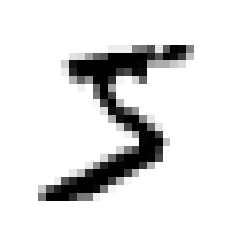

In [4]:
# %matplotlib inline: 해당 노트북에 이미지 등을 바로 출력한다.
%matplotlib inline

# matplotlib과 matplotlib.pyplot의 차이점(https://kongdols-room.tistory.com/72)
  # matplotlib: 전체를 아우르는 패키지
  # matplotlib.pyplot: 사용환경 인터페이스(state-machine interface)를 제공하고, 겉으로는 드러나지 않으면서 자동으로 figure와 axes를 생성하며, 정의된 플롯을 얻을 수 있도록 만들어준다.
    # figure: matplotlib은 한 번에 한장의 그림을 그린다. 이 그림이 figure. 그림을 그리는 캔버스이고, 하나의 figure에는 여러 개의 plot이 들어갈 수 있다.
    # axes: 보통 plot으로 생각하는 하나의 그래프. 각각의 axes는 개별적으로 제목 및 x/y 레이블을 가질 수 있다.
import matplotlib as mpl
import matplotlib.pyplot as plt

# X에 저장된 mnist['data']의 첫번째 데이터(벡터)를 some_digit에 저장
some_digit = X[0]

# some_digit에 저장한 벡터값을 28x28 배열 형태로 재구성
some_digit_image = some_digit.reshape(28, 28)

# 이미지 출력
# cmap(색 지정) = mpl.cm.binary(binary 색 지정)
  # 색 참고: https://codetorial.net/matplotlib/set_colormap.html
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

# 축은 출력하지 않음
plt.axis("off")

plt.show()

In [5]:
# 위의 출력한 손글씨의 정답을 출력
y[0]

'5'

In [7]:
# 레이블은 문자열임. 대부분 머신러닝 알고리즘은 숫자를 기대하므로 y를 정수로 변환
import numpy as np
y = y.astype(np.uint8)

In [8]:
def plot_digit(data):
    # 이미지 벡터를 28x28 배열로 reshape
    image = data.reshape(28, 28)

    # 이미지 출력
    # interpolation: 보간법을 말한다. 영상을 기하학적 변환할 때, 원 영상의 아무런 정보를 받지 못하는 Pixel(이런 Pixel을 hole이라고 함)이 생길 수 있는데,
      # interpolation이란 위와 같은 픽셀 주변의 알고 있는 값들을 이용해 pixel의 값을 유도하는 과정을 뜻한다.
      # neareast: 최근접 보간법으로 가장 가까운 화소값을 사용한다. 따라서 계산이 빠르지만 경계선이 망가지고 해상도가 낮아진다.
      # interpolation 종류 참고: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=dic1224&logNo=220840978075
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [9]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

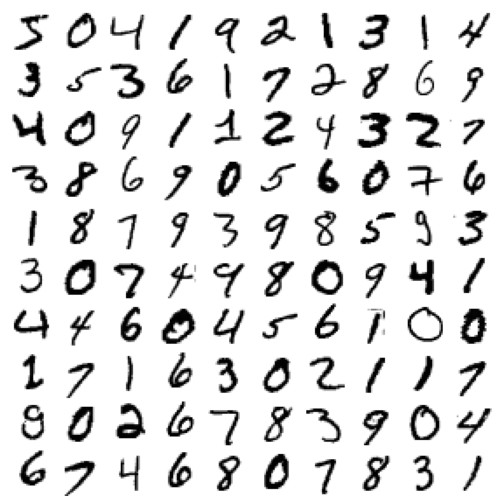

In [10]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [11]:
# 데이터를 60000개와 10000개로 나누어 저장
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 이진 분류기 훈련

In [12]:
# 5는 True, 나머지 숫자는 모두 False로 처리하는 이진 분류
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
# sklearn에서 제공하는 확률적 경사 하강법 분류기(SGDClassfier) import
from sklearn.linear_model import SGDClassifier

# SGDClassifier 객체 생성
  # max_iter: 반복 횟수
  # tol: 정밀도
  # random_state: 난수 초기값
  # 다른 옵션 참고: https://inuplace.tistory.com/516
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
# some_digit에 저장된 X[0]의 이미지를 SGDClassifier로 감지
sgd_clf.predict([some_digit])

array([ True])

### 성능 측정

#### 교차 검증을 사용한 정확도 측정

In [15]:
# StratifiedKFold는 클래스별 비율이 유지되도록 폴드를 만들기 위해 계측적 샘플링을 수행하는 방식
  # 매 반복에서 분류기 객체를 복제해 훈련 폴드로 훈련시키고 테스트 폴드로 예측을 만든다. 
  # 그런 다음 올바른 예측의 수를 세어 정확한 예측의 비율을 출력한다.
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# shuffle=False가 기본값이기 때문에 random_state를 삭제하던지 shuffle=True로 지정하라는 경고가 발생합니다.
# 0.24버전부터는 에러가 발생할 예정이므로 향후 버전을 위해 shuffle=True을 지정합니다.
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

# skfolds.split()을 호출해서 폴드별 X_train, y_train_5의 로우 인덱스를 array로 변환
for train_index, test_index in skfolds.split(X_train, y_train_5):

    # 클론 객체 생성
    clone_clf = clone(sgd_clf)

    # train_index에 저장된 인덱스에 해당하는 X_train의 데이터를 저장
    X_train_folds = X_train[train_index]

    # train_index에 저장된 인덱스에 해당하는 y_train_5의 데이터를 저장
    y_train_folds = y_train_5[train_index]

    # test_index에 저장된 인덱스에 해당하는 X_train의 데이터를 저장
    X_test_fold = X_train[test_index]

    # test_index에 저장된 인덱스에 해당하는 y_train_5의 데이터를 저장
    y_test_fold = y_train_5[test_index]

    # 매 반복마다 분류기 객체를 복제해서 훈련 폴드로 훈련
    clone_clf.fit(X_train_folds, y_train_folds)

    # 테스트 폴드로 예측을 만든다.
    y_pred = clone_clf.predict(X_test_fold)

    # 올바른 예측의 수를 세어서 정확한 예측의 비율을 출력
    # https://velog.io/@ntbij29/chapter-3-%EB%B6%84%EB%A5%98-3.3
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
# 모든 이미지를 '5 아님' 클래스로 분류하는 더미 분류기 만들기
from sklearn.base import BaseEstimator

# 위 코드에서 import 한 BaseEstimator 상속
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

#### 오차 행렬

In [19]:
# 오차행렬: 예를 들어 클래스 A의 샘플이 클래스 B로 분류되는 횟수를 세는 것.(정답은 행으로 오답은 열로)
# 오차 행렬을 만들려면 실제 타깃과 비교할 수 있도록 먼저 예측값을 만들어야 한다.
# test set으로는 출시 준비를 마치고 나서 프로젝트의 맨 마지막에 사용되어야 하므로 건드리면 안되기 때문에, 
# 대신 cross_val_predict() 함수를 사용한다  
  # cross_val_predict: cross_val_score()처럼 k-fold cross validation을 수행하지만 평가 점수를 반환하지 않고 각 test fold에서 얻은 예측을 반환한다.
  # 즉, 훈련 세트의 모든 샘플에 대해 새로운 데이터에 대한 예측을 얻게 된다.
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
# confusion_matrix 함수를 사용해 오차행렬을 만든다.
from sklearn.metrics import confusion_matrix

# target class(y_train_5)와 prediction class(y_train_pred)를 넣고 confusion_matrix 함수 호출
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

오차 행렬의 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타낸다.

이 행렬의 첫번째 행은 '5 아님'에 대한 이미지 음성 클래스 ; negative class 에 대한 것이고 53892개를 '5 아님' 클래스로 정확히 분류한(진짜 음성 ; true negative)이고 나머지 687를 '5'라고 잘못 분류한 거짓 분류 ; false negative 이다.

두번째 행은 '5' 이미지 양성 클래스 ; positive class 에 대한 것으로, 1891개를 '5 아님'으로 잘못 분류한 거짓 음성 ; false negative 이고 나머지 3530개를 정확히 '5'로 분류한 진짜 양성 ; true positive 이다.

완벽한 분류기라면 진짜 양성과 진짜 음성만을 가지고 있을 것이므로 다음과 같이 오차 행렬의 주대각선만 0이 아닌 값이 된다.

이보다 더 요약된 지표가 필요할 때 양성 예측의 정확도를 보여주는 분류기의 정밀도 ; prediction 을 확인해보자.

In [21]:
y_train_perfect_predictions = y_train_5  # 완변한척 하자
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

#### 정밀도와 재현율

In [22]:
# sklearn에서 제공하는 정밀도와 재현율 지표를 계산하는 함수를 import
from sklearn.metrics import precision_score, recall_score

# 정밀도 score 출력
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [23]:
# 오차행렬을 활용해 정밀도 계산
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [24]:
# 재현율 함수로 계산
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [25]:
# 오차행렬로 재현율 계산
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [26]:
# 정밀도와 재현율을 하나로 합쳐 F1 score로 만들 수 있는데, sklearn에서 제공하는 함수로 계산할 수 있음
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [27]:
# 오차 행렬로 F1 score 계산
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

#### 정밀도/재현율 트레이드 오프

In [29]:
# decision_function() 메서드를 호출해 각 샘플의 점수를 얻을 수 있다.
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [31]:
# 임계값을 0으로 설정
threshold = 0

# 각 샘플의 점수가 설정한 임계값 0을 넘으면 True 반환, 그렇지 않으면 False 반환
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [32]:
# 임계값을 0에서 8000으로
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

숫자 5를 감지하는 모델일 때, 임계값이 너무 낮으면 5가 아닌 숫자도 5로 인식할 수 있고, 반대로 너무 높으면 5를 제대로 인식하지 않을 수도 있다.

In [33]:
# method에 decision_function을 지정해 결정 점수를 반환받는다.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [35]:
from sklearn.metrics import precision_recall_curve

# precision_recall_curve() 함수를 사용해 가능한 모든 임계값에 대해 정밀도와 재현율을 계산한다.
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

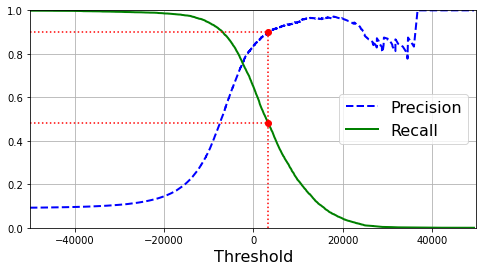

In [44]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # x축 데이터, y축 데이터, 파란색 점선, 라벨, 줄의 두께
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

    # legend: 그래프 데이터의 종류를 표시.
      # loc: 위치, fontsize: 글씨 크기
    plt.legend(loc="center right", fontsize=16)

    # xlabel: x축 이름 붙이기
    plt.xlabel("Threshold", fontsize=16)
    
    # grid(True)로 두면 그래프 안에 격자가 생기고 False로 두면 없어진다
    plt.grid(True)                            
    
    # 축의 구간 설정  
    plt.axis([-50000, 50000, 0, 1])            



# np.argmax: 최대값의 색인(index) 위치 찾기. 첫번째 인덱스를 반환한다.
# precision >= 0.90이상인 시점부터 recall의 최대값 지점
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]


threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


# (8, 4) 사이즈의 figure 생성
plt.figure(figsize=(8, 4))   

# 그래프 그리기
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
                                       
plt.show()

In [45]:
(y_train_pred == (y_scores > 0)).all()

True

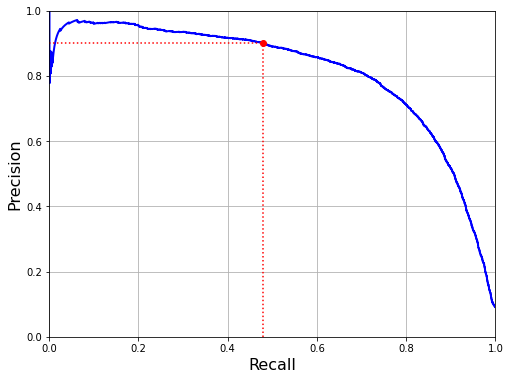

In [46]:
def plot_precision_vs_recall(precisions, recalls):
    # x축 recall, y축 precision, 파란색 실선, 줄 두께 2
    plt.plot(recalls, precisions, "b-", linewidth=2)

    # x축 라벨에 Recall 적기
    plt.xlabel("Recall", fontsize=16)

    # y축 라벨에 precision 적기
    plt.ylabel("Precision", fontsize=16)

    # 두 축의 구간 정하기
    plt.axis([0, 1, 0, 1])

    # 그래프 안에 격자 넣기
    plt.grid(True)

# figure 선언
plt.figure(figsize=(8, 6))

# 만든 figure에 plot 넣기
plot_precision_vs_recall(precisions, recalls)

plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [48]:
# np.argmax 메서드로 정밀도가 0.90이상이 되는 최소점의 임계값 지점을 찾는다.
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

threshold_90_precision

3370.0194991439557

In [49]:
# 정밀도가 90% 이상인 임계값보다 높은 y_score
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [50]:
# 정밀도 확인
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [51]:
# 재현율 확인
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

#### ROC(Receive Operating Cjaracteristic) 곡선
수신기 조작 특성 곡선은 거짓 양성(거짓으로 잘못 분류된 음성 샘플) 비율에 대한 진짜 양성 비율이다.

In [52]:
# roc_curve import
from sklearn.metrics import roc_curve

# fpr: 거짓 양성 비율. 1에서 음성으로 정확하게 분류한 음성 샘플의 비율인 tnr을 뺀 값이다.
# tpr: 진짜 양성 비율. 재현율의 다른 이름
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

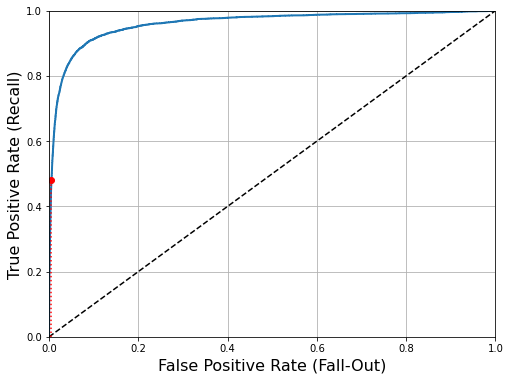

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                           

plt.figure(figsize=(8, 6))                                   
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")                                           
plt.show()

In [55]:
# auc: 곡선 아래의 면적
  # 완벽한 분류기는 ROC의 AUC가 1이고 완전한 랜덤 분류기는 0.5이다.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [56]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier의 n_estimator를 100, 난수 초기값을 42로
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)


y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [58]:
y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

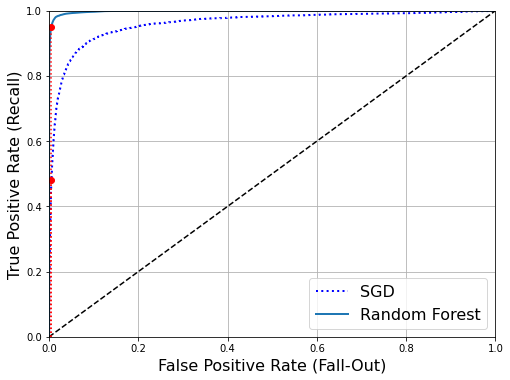

In [60]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [61]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

### 다중 분류

In [62]:
# SVC: 서포트 벡터 머신 분류기
from sklearn.svm import SVC

# SVC 객체 생성
  # gamma: decision boundary를 조절하는 파라미터
svm_clf = SVC(gamma="auto", random_state=42)

# x_train, y_train 각각 1000번까지의 데이터를 적용
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train_5이 아니라 y_train입니다
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [63]:
# decision_function 메서드를 호출해 샘플당 10개(클래스의 수)의 점수를 반환
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [64]:
# 가장 높은 수치의 인덱스
np.argmax(some_digit_scores)

5

In [65]:
# 클래스 출력
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [66]:
svm_clf.classes_[5]

5

In [67]:
# sklearn에서 OvO, OvR을 사용하도록 강제하려면 OneVsOneClassifier나 OneVsRestClassifier를 사용한다.
from sklearn.multiclass import OneVsRestClassifier

# SVC 기반으로 OvR 전략을 사용하는 다중 분류기 생성
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [68]:
len(ovr_clf.estimators_)

10

In [69]:
# SGDClassifier로 다중 분류 수행
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [70]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [71]:
# SGDClassifier 분류기 평가
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [72]:
# 입력 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 적용
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### 에러 분석

In [73]:
# cross_val_predict 함수를 호출해 예측을 만든다.
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# 오차행렬 만들기
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [74]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    # figure 생성
    fig = plt.figure(figsize=(8,8))

    # figure 안에 넣을 subplot 생성
    ax = fig.add_subplot(111)

    # matshow 메서드를 이용해 인자로 받은 행렬을 이미지로 표현
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

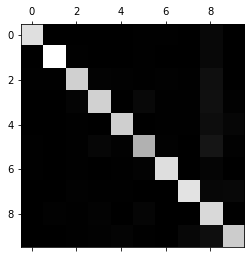

In [75]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

plt.show()

In [76]:
# 오차행렬의 각 열을 더한다.
# keepdims: 행렬의 차원을 유지?
row_sums = conf_mx.sum(axis=1, keepdims=True)

# 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율을 계산
norm_conf_mx = conf_mx / row_sums

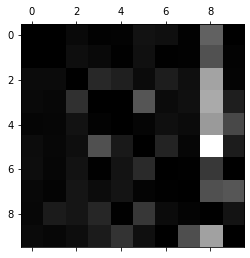

In [77]:
# 주 대각선만 0으로 채운다.
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

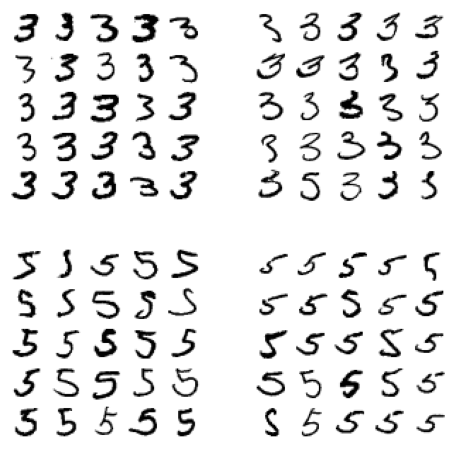

In [78]:
# 3과 5의 샘플을 그려본다.
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### 다중 레이블 분류

In [79]:
# KNeighborsClassifier import
from sklearn.neighbors import KNeighborsClassifier

# 숫자가 큰 값(7, 8, 9)인지 나타낸다
y_train_large = (y_train >= 7)

# 숫자가 홀수인지 나타낸다.
y_train_odd = (y_train % 2 == 1)

# 두 배열을 세로로 붙여 2차원 배열로
y_multilabel = np.c_[y_train_large, y_train_odd]

# KNeighborsClassifier 객체 생성
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [80]:
# 예측 생성
knn_clf.predict([some_digit]) # 출력 [[False, True]]: 숫자 5는 '크지 않고'(False), '홀수'이다.(True )

array([[False,  True]])

In [81]:
# 교차 검증
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# f1 score 
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

### 다중 출력 분류

In [82]:
# randint 함수로 픽셀 강도에 잡음을 추가하기 위해 (len(x_train)x784) 크기의 noise 변수 정의
noise = np.random.randint(0, 100, (len(X_train), 784))

# 잡음 추가
X_train_mod = X_train + noise

# randint 함수로 픽셀 강도에 잡음을 추가하기 위해 (len(x_test)x784) 크기의 noise 변수 정의
noise = np.random.randint(0, 100, (len(X_test), 784))

# 잡음 추가
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

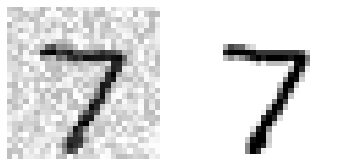

In [83]:
some_index = 0
# 잡음을 추가한 이미지
plt.subplot(121); plot_digit(X_test_mod[some_index])

# 깨끗한 이미지
plt.subplot(122); plot_digit(y_test_mod[some_index])

plt.show()

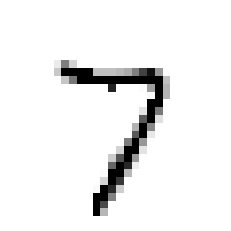

In [84]:
# KNeighborClassifier 적용
knn_clf.fit(X_train_mod, y_train_mod)

# 예측
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)


# 4장. 모델 훈련